In [ ]:
import pandas as pd
import seaborn as sn
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bhp.csv to bhp.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bhp.csv']))

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.price_per_sqft.describe()

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


In [ ]:
#1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [29]:
minimum = df.price_per_sqft.quantile(0.001)
minimum

1366.184

In [30]:
maximum = df.price_per_sqft.quantile(0.999)
maximum

50959.36200000098

In [31]:
#outliers
df[(df.price_per_sqft< 1366.184)|(df.price_per_sqft>50959.36200000098)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [32]:
#Removing outliers
df1 = df[(df.price_per_sqft > minimum)&(df.price_per_sqft < maximum)]
df1.shape

(13172, 7)

In [33]:
#new dataframe
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

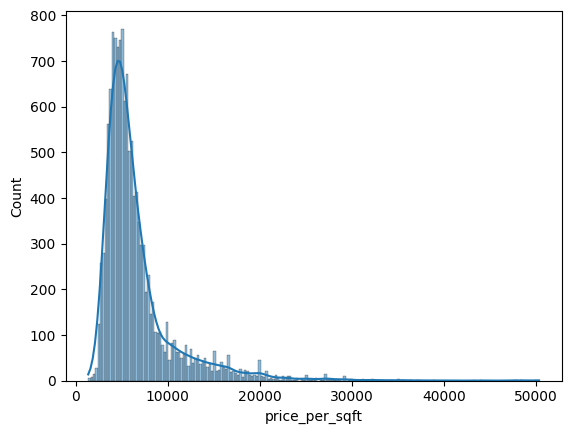

In [34]:
sn.histplot(df1.price_per_sqft, kde=True)

In [12]:
#3. On step(2) dataframe, use 4 standard deviation to remove outliers

In [35]:
mean = df1.price_per_sqft.mean()
mean

6663.6537351958705

In [36]:
std = df1.price_per_sqft.std()
std

4141.020700174605

In [39]:
mean - 4*std

-9900.429065502549

In [41]:
df1[df1.price_per_sqft < (mean - 4*std)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [42]:
df1[df1.price_per_sqft > (mean + 4*std)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [44]:
#total outliers
df1[(df1.price_per_sqft < (mean - 4*std)) | (df1.price_per_sqft > (mean + 4*std))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [45]:
df_no_outlier = df1[(df1.price_per_sqft > (mean - 4*std)) & (df1.price_per_sqft < (mean + 4*std))]
df_no_outlier.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

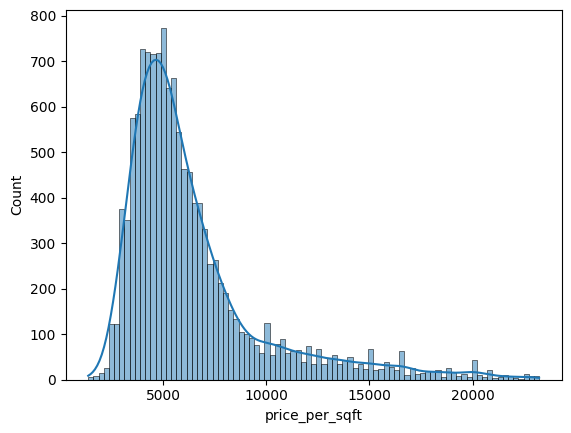

In [46]:
#4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
sn.histplot(df_no_outlier.price_per_sqft, kde=True)

In [47]:
#5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [50]:
df1['zscore'] = (df1.price_per_sqft - mean)/std
df1

<ipython-input-50-b66fb3f8b7e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = (df1.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [51]:
df1[df1.zscore<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [52]:
df1[df1.zscore>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [53]:
#total outliers
df1[(df1.zscore<-4)| (df1.zscore > 4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [55]:
df_no_outliers_zscore = df1[(df1.zscore > -4) & (df1.zscore < 4)]
df_no_outliers_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


<Axes: xlabel='price_per_sqft', ylabel='Count'>

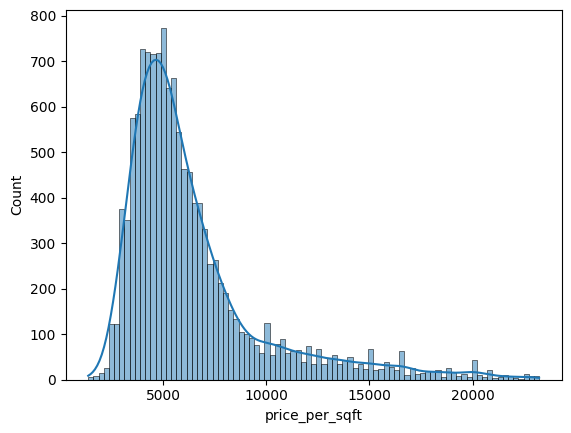

In [56]:
sn.histplot(df_no_outliers_zscore.price_per_sqft, kde=True)